In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.constants import fn_target_lts_dc, dir_data
from src.ftr_aggregate import load_joint_features
import src.sk_ml; reload(src.sk_ml)
from src.sk_ml import *

In [58]:
%matplotlib inline

In [ ]:

fna = 0.0
years = (2014, 2015, 2016, 2017)
total = 'NO_TOTAL'
normalization = 'MinMaxScaler'

cv_dir = 'data/cross_validation/na_{}-year_{}-total_{}-norm_{}'.format(fna, years, total, normalization)


In [11]:


print 'load feature and fill NAN'
ftr, mapping = load_joint_features(years=years, how=total)
ftr_names = [mapping[f] for f in ftr.columns]
ftr = fillna(ftr, how=fna)

print 'load LTS and remove 10'
lts = pd.read_csv(dir_data + fn_target_lts_dc, index_col=0)
lts = lts[lts.LTS!=10].dropna()

print 'create train and test set'
dataset = lts.merge(ftr, left_index=True, right_index=True)
train, test = train_test_split(dataset, test_size=0.2, random_state=0)
train_y = train.LTS
train_x = train.drop('LTS', axis=1)
test_y = test.LTS
test_x = test.drop('LTS', axis=1)

load feature and fill NAN
load LTS and remove 10
create train and test set


In [9]:
models = sk_models(stoplist=())
params = grid_cv_default_params()


In [16]:
kind = 'cls'
name = 'GDBcls'
gbst = models[kind][name]
param = params[kind][name]

In [18]:
cv_res = grid_cv_a_model(train_x, train_y, gbst, param, kind, name, path=cv_dir, verbose=True)

fitting model cls GDBcls
loaded existing result for model: GDBcls


{'best_model': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.0316227766017, loss='deviance', max_depth=10,
               max_features=0.5, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=100, presort='auto', random_state=None,
               subsample=1.0, verbose=0, warm_start=False),
 'best_params': {'learning_rate': 0.03162277660168379,
  'max_depth': 10,
  'max_features': 0.5,
  'n_estimators': 100},
 'grid_cv_time': None,
 'kind': 'cls',
 'mean_fit_time': 582.99139995600001,
 'mean_test': 0.70678866789299999,
 'mean_train': 0.972295286689,
 'model_name': 'GDBcls',
 'score': 'f1_weighted'}

In [23]:
confusion_matrix_as_df(gbst, train_x, train_y, labels=[1,2,3,4])

,1,2,3,4
1,4529,3,1,0
2,199,2346,9,2
3,117,24,1943,1
4,16,6,2,1436


In [22]:
confusion_matrix_as_df(gbst, test_x, test_y, labels=[1,2,3,4])

,1,2,3,4
1,1004,118,30,12
2,227,292,92,12
3,53,64,330,57
4,25,19,52,272


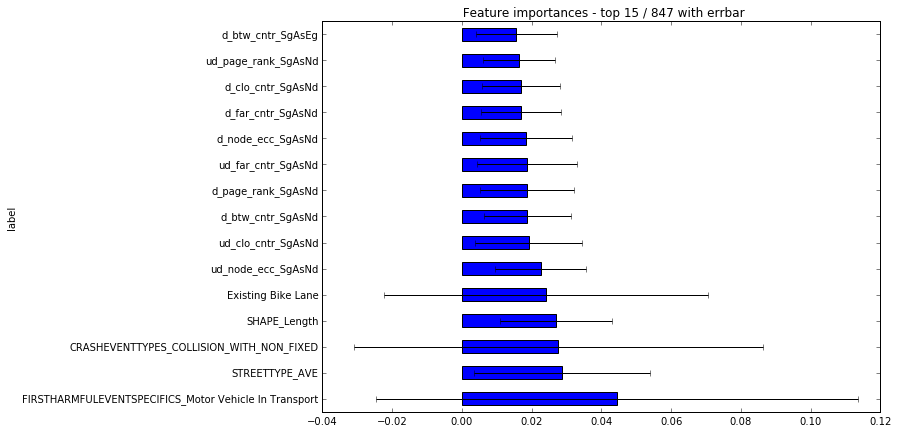

In [92]:
imp = show_important_features(gbst, labels=ftr_names, top=15, set_std=True, show_plt=True)